<a href="https://colab.research.google.com/github/ddfulaa/AlgorithmsUN2020II/blob/master/GaleShapleyIrving/Laboratory9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Laboratory 9**
---





#1
Find the best and worst cases for the Gale-Shapley and Irving ( [An Efficient Algorithm for the “Stable Roommates” Problem](http://www.dcs.gla.ac.uk/~pat/jchoco/roommates/papers/Comp_sdarticle.pdf "An Efficient Algorithm for the “Stable Roommates” Problem")) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.
* Gale–Shapley algorithm simply explained – [towardsdatascience](https://towardsdatascience.com/gale-shapley-algorithm-simply-explained-caa344e643c2 "Gale–Shapley algorithm simply explained")
* Stable Marriage Problem – [geeksforgeeks](https://www.geeksforgeeks.org/stable-marriage-problem/ "Stable MArriage Problem")
* Stable matching, as a game – [towardsdatascience.com](https://towardsdatascience.com/stable-matching-as-a-game-a68c279d70b "Stable matching, as a game")



### **Gale-Shapeley's algorithm pseudocode (male proposes)**
```
function stableMatching {
    Initialize all m ∈ M and w ∈ W to free
    while ∃ free man m who still has a woman w to propose to {
       w = first woman on m’s list to whom m has not yet proposed
       if w is free
         (m, w) become engaged
       else some pair (m', w) already exists
         if w prefers m to m'
            m' becomes free
           (m, w) become engaged 
         else
           (m', w) remain engaged
    }
}
```

**Note:** Each preference list is ordered from left to right in increasing order of the rank, i.e., the leftmost person is the most preferable and the rightmost person is the least preferable.



**Best case for Gale-Shapeley**

This happens when a man has a woman as a first option to propose, and that woman also prefers the man over the others. The algorithm in this case just runs $n$ times, one for each man.

**Worst case for Gale-Shapeley**

We know that this algorithm is optimal for men but not for women. Then it is natural to think the worst case happens when for all men are assigned a partner with low priority while women are paired with their first option[1]. (https://www.mdpi.com/1999-4893/6/2/371/htm#B2-algorithms-06-00371) 



In [1]:

def stableMatching(lw,lm):
  n=len(lw)
  men=[i for i in range(n)]
  disp_women=[True for _ in range(n)] #a list who contains the values of dispossable women
  preference_list_men=lm[:] #copy the preference lists of men
  preference_list_women=lw[:] #copy the preference lists of men
  pairs={}
  count=0
  while len(men)>0:
    count +=1
    m=men.pop(0)
    if len(preference_list_men[m])>0:
      w=preference_list_men[m].pop(0)
      if disp_women[w]:
        pairs[w]=m
        disp_women[w]=False  
      else:
        m_w=pairs[w]
        preference_order_m_w=preference_list_women[w].index(m_w)
        preference_order_m=preference_list_women[w].index(m)
        if preference_order_m<preference_order_m_w:
          men.append(m_w)
          pairs[w]=m
        else:
          men.append(m)
  return [pairs,count]

In [2]:
def bestCaseBuilder(n):
  aux=[i for i in range(n)]
  lw=[]
  for i in range(n):
    lw.append(aux[i:]+aux[:i])
  lm=lw[:]
  return [lw,lm]

def worstCaseBuilder(n):
  aux=[i for i in range(n)]
  lw=[]
  for i in range(n):
    lw.append(aux[i:]+aux[:i])
  lw.append(lw.pop(0))
  lm=[]
  for i in range(n):
    lm.append(aux[i:n-1]+aux[:i]+aux[n-1:])
  return [lw,lm]

enes=[4,40]
max_iter={}
min_iter={}
for n in enes:
  best_case=bestCaseBuilder(n)
  worst_case=worstCaseBuilder(n)
  result=stableMatching(best_case[0],best_case[1])
  print("For n=",n,"\n--- Best case ---")
  print("Women preference lists:",best_case[0])
  print("Men preference lists:",best_case[1])
  print("Match:",result[0]) #
  print("# of iterations",result[1]) #Number of iterations
  min_iter[n]=result[1] #We use this for point 2
  result=stableMatching(worst_case[0],worst_case[1])
  print("--- Worst case ---")
  print("Women preference lists:",worst_case[0])
  print("Men preference lists:",worst_case[1])
  print("Match:",result[0]) #
  print("# of iterations",result[1],"\n-------------") #Number of iterations
  max_iter[n]=result[1] #We use this for point 2
  

For n= 4 
--- Best case ---
Women preference lists: [[1, 2, 3], [2, 3, 0], [3, 0, 1], [0, 1, 2]]
Men preference lists: [[1, 2, 3], [2, 3, 0], [3, 0, 1], [0, 1, 2]]
Match: {0: 0, 1: 1, 2: 2, 3: 3}
# of iterations 4
--- Worst case ---
Women preference lists: [[1, 2, 3, 0], [2, 3, 0, 1], [3, 0, 1, 2], [0, 1, 2, 3]]
Men preference lists: [[], [3], [3], [3]]
Match: {0: 1, 1: 2, 2: 3, 3: 0}
# of iterations 13 
-------------
For n= 40 
--- Best case ---
Women preference lists: [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 0], [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 0, 1], [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24

**Irving's algorithm for Roommate problem**

The following code was not written by me, but it was taken from [here](https://github.com/jmoh3/stable_roommates/blob/master/stable_roommates.py)


In [3]:
def get_ranking_matrix(preference):
    rank = [[None for j in range(len(preference))] for i in range(len(preference))]

    for i in range(len(preference)):
        for j in range(len(preference[i])):
            rank[i][preference[i][j]] = j
    
    return rank

def stable_roommates_phase_1(preference, rank):
    proposal = [None for x in range(len(preference))]
    first = [0 for x in range(len(preference))]
    last = [len(x) for x in preference]
    to_process = [x for x in range(len(preference))]
    
    while len(to_process) > 0:
        i = to_process[0]
        
        # update first pointer if necessary
        while preference[i][first[i]] == None:
            first[i] += 1
            
        top_pick = preference[i][first[i]]
        
        # top pick hasn't been proposed to yet, so they accept
        if proposal[top_pick] == None:
            proposal[top_pick] = i
            
            match_rank = preference[top_pick].index(i)
            
            # all candidates worse than i are rejected, must remove top_pick from their preference list
            for x in range(match_rank+1, last[top_pick]):
                reject = preference[top_pick][x]
                preference[reject][rank[reject][top_pick]] = None
            
            # update last pointer
            last[top_pick] = match_rank
            del to_process[0]
            
            continue
        
        curr_match_idx = rank[top_pick][proposal[top_pick]]
        potential_match_idx = rank[top_pick][i]
        
        if curr_match_idx < potential_match_idx: # current matching is preferred, i is rejected
            preference[top_pick][potential_match_idx] = None
            
            first[i] += 1 # start at next spot
            
            continue
        else: # accept proposal, so old match has to return to their preference list again
            preference[top_pick][curr_match_idx] = None
            
            # old match is rejected by top_pick, must update their list
            top_pick_idx = rank[proposal[top_pick]][top_pick]
            preference[proposal[top_pick]][top_pick_idx] = None
            
            del to_process[0]
            # add old match to to_process
            to_process.insert(0, proposal[top_pick])
            
            proposal[top_pick] = i
            last[top_pick] = potential_match_idx
    
    return first, last, preference

def clean_preferences(first, last, preferences):
    for i in range(len(preferences)):
        for j in range(len(preferences[i])):
            if j < first[i] or j > last[i]:
                preferences[i][j] = None

    return preferences

def find_second_favorite(i, first, last, pref):
    count = 0
    for j in range(first[i], last[i]+1):
        if not pref[j] == None:
            count += 1
        elif count == 0:
            first[i] += 1
        if count == 2:
            return pref[j]
    return None

def find_rotation(i, p, q, first, last, preferences):
    second_favorite = find_second_favorite(p[i], first, last, preferences[p[i]])
    next_p = preferences[second_favorite][last[second_favorite]]
    
    if next_p in p:
        # rotation found!
        j = p.index(next_p)
        q[j] = second_favorite
                
        return p[j:], q[j:]

    q.append(second_favorite)
    p.append(next_p)
    return find_rotation(i+1, p, q, first, last,  preferences)

def eliminate_rotation(p, q, first, last, preferences, rank):
    for i in range(len(p)):
        # q_i rejects p_i so that p_i proposes to q_i+1
        preferences[p[i]][rank[p[i]][q[i]]] = None
        
        # all successors of p_i-1 are removed from q_i's list, and q_i is removed from their lists
        for j in range(rank[q[i]][p[i-1]]+1, last[q[i]]):
            reject = rank[q[i]].index(j) #preferences[q[i]][j]
            preferences[reject][rank[reject][q[i]]] = None
            
        last[q[i]] = rank[q[i]][p[i-1]]

def stable_roommates_phase_2(first, last, preferences, rank):
    while True:
        p, q = None, None
        # find first p_0 to get a rotation from
        # preference list of p_0 must contain at least 2 elements
        for i in range(len(preferences)):
            if last[i] - first[i] > 0 and find_second_favorite(i, first, last, preferences[i]) != None:
                p, q = find_rotation(0, [i], [None], first, last, preferences)
                break
        
        if not p and not q:
            return preferences
        
        # eliminate rotation
        eliminate_rotation(p, q, first, last, preferences, rank)

def match_roommates(preferences):
    rank = get_ranking_matrix(preferences)
    first, last, preferences = stable_roommates_phase_1(preferences, rank)
    stable_roommates_phase_2(first, last, preferences, rank)
    clean_preferences(first, last, preferences)
    
    matches = []
    length = len(preferences)
    visited = set()
    i = 0
    
    for i in range(len(preferences)):
        if not i in visited:
            pair = (i, preferences[i][last[i]])
            visited.add(last[i])
            matches.append(pair)
    
    return matches

preferences = [[2, 3, 4, 5, 1], [5, 4, 3, 0, 2], [1, 3, 4, 0, 5], [4, 1, 2, 5, 0], [2, 0, 1, 3, 5], [4, 0, 2, 3, 1]]

print(match_roommates(preferences))

[(0, 5), (1, 3), (4, 2), (5, 0)]


#2
Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.


For n= 4
# minimum of iterations: 4
# maximum of iterations: 11
# average of iterations: 6.618


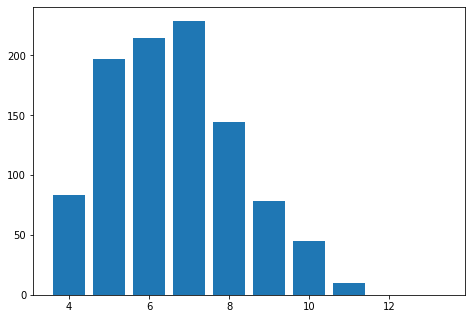

For n= 40
# minimum of iterations: 84
# maximum of iterations: 362
# average of iterations: 157.936


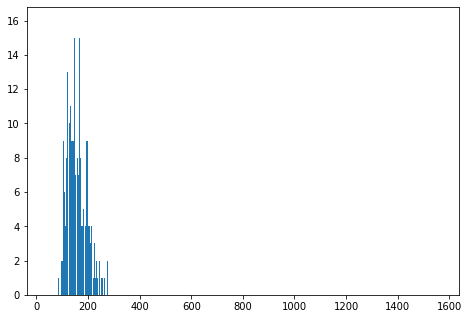

In [4]:
import random as rnd
import matplotlib.pyplot as plt

def randomPreferenceListsGenerator(n):
  lists_women = []
  for _ in range(n):
    aux=[i for i in range(n)]
    rnd.shuffle(aux)
    lists_women.append(aux[:])
  lists_men =[]
  for _ in range(n):
    aux=[i for i in range(n)]
    rnd.shuffle(aux)
    lists_men.append(aux[:])
  return [lists_women,lists_men]


k=1000 #times will run the algorithm

enes=[4,40] #size of the preference lists
for n in enes:
  print("For n=",n)
  iterations=[0 for _ in range(min_iter[n],max_iter[n]+1)]
  max_iterations=min_iter[n]
  min_iterations=max_iter[n]
  acumm_iter=0
  for _ in range(k):
    preferencias=randomPreferenceListsGenerator(n)
    resultado=stableMatching(preferencias[0],preferencias[1])
    iterations[resultado[1]-min_iter[n]] +=1
    max_iterations=max(max_iterations,resultado[1])
    min_iterations=min(min_iterations,resultado[1])
    acumm_iter += resultado[1]
  average_iter= acumm_iter/k
  print("# minimum of iterations:",min_iterations)
  print("# maximum of iterations:",max_iterations)
  print("# average of iterations:",average_iter)
  fig = plt.figure()
  ax1 = fig.add_axes([0,0,1,1])
  ax1.bar(range(min_iter[n],max_iter[n]+1),iterations)
  plt.show()




